In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import expm

In [2]:
def P_calc(p,t,A,B,N,M,m):
    p = p.reshape([m,m])
    p_t = p.transpose()
    N_inv = LA.inv(N)
    dpdt = -np.dot(A.transpose(),p) - np.dot(p,A) + np.dot(p_t,np.dot(B,np.dot(N_inv,np.dot(B.transpose(),p)))) - M
    return dpdt.reshape(-1)

In [3]:
def X_cauchy_calc(x,t,A,B,N,T,M,f,n,r):
    N_inv = LA.inv(N)
    dxdt = np.dot((A  - np.dot(-B,np.dot(N_inv,np.dot(B.T,f(t))))),x)
    return dxdt.reshape(-1)

In [4]:
def Matrix_dif(X,t,A,B,N,T,M,F,n,r):
    N_inv = LA.inv(N)
    X = X.reshape([n,n])
    dxdt = np.dot((A  - np.dot(-B,np.dot(N_inv,np.dot(B.T,f(t))))),X)
    return dxdt.reshape(-1)

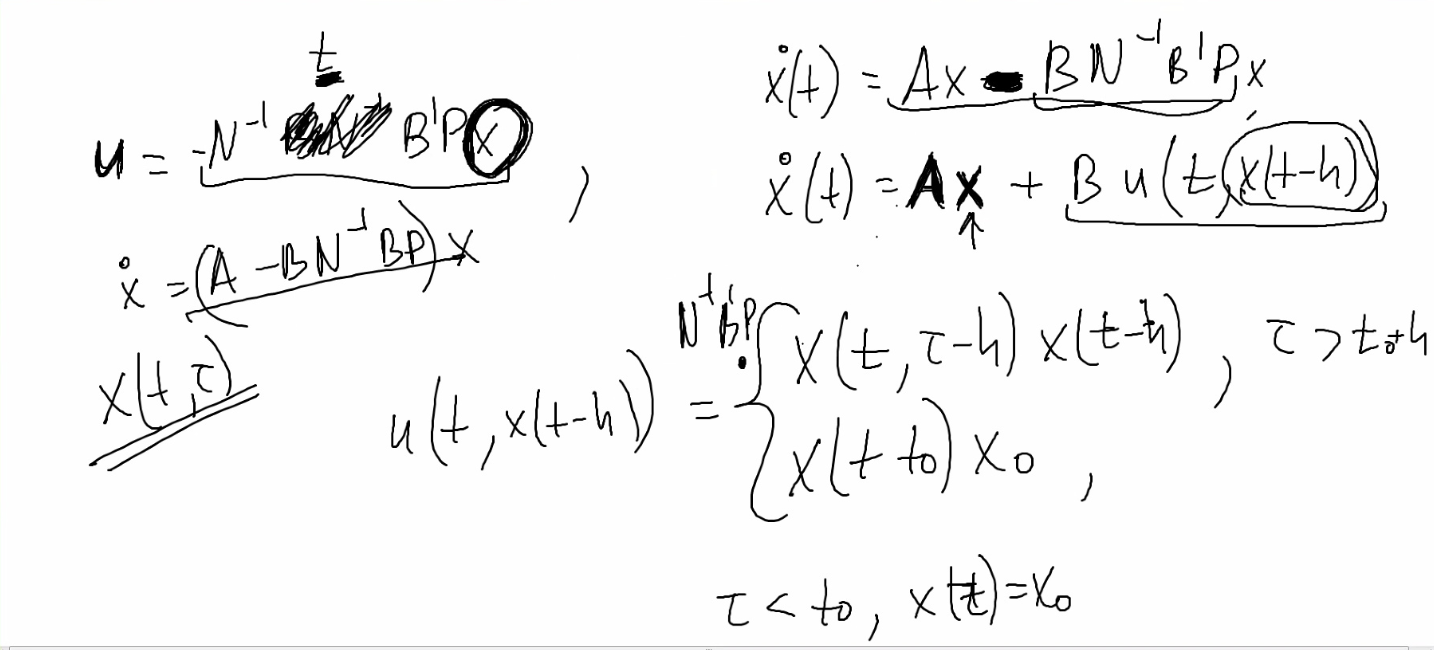

\begin{equation}
    \dot{x} = Ax + Bu
\end{equation}

\begin{equation}
    J(t_0, x_0,u(\cdot)) = \int_{t_0}^{t_1}(x,M(t)x) + (u,N(t)u)dt + (x(t_1),Tx(t_1)), x(t_0) = x_0 
\end{equation}

\begin{equation}
    M(t) = M'(t) \geq 0, N(t) = N'(t) > 0, T > 0
\end{equation}

\begin{equation}
    u^* = -N^{-1}B'Px
\end{equation}

\begin{equation}
    \dot{x} = Ax - BN^{-1}B'Px = (A - BN^{-1}B'P)x
\end{equation}

Решив эту систему найдем $X(t,\tau).$ После, по формуле найдем:
\begin{equation}
    u(t,x(t-h)) = -N^{-1}B'P 
    \begin{cases}
    X(t,\tau - h)x(t-h), \ \tau > t_0 + h, \\
    X(t,t_0)x_0, \ \tau < t_0
    \end{cases}
\end{equation}



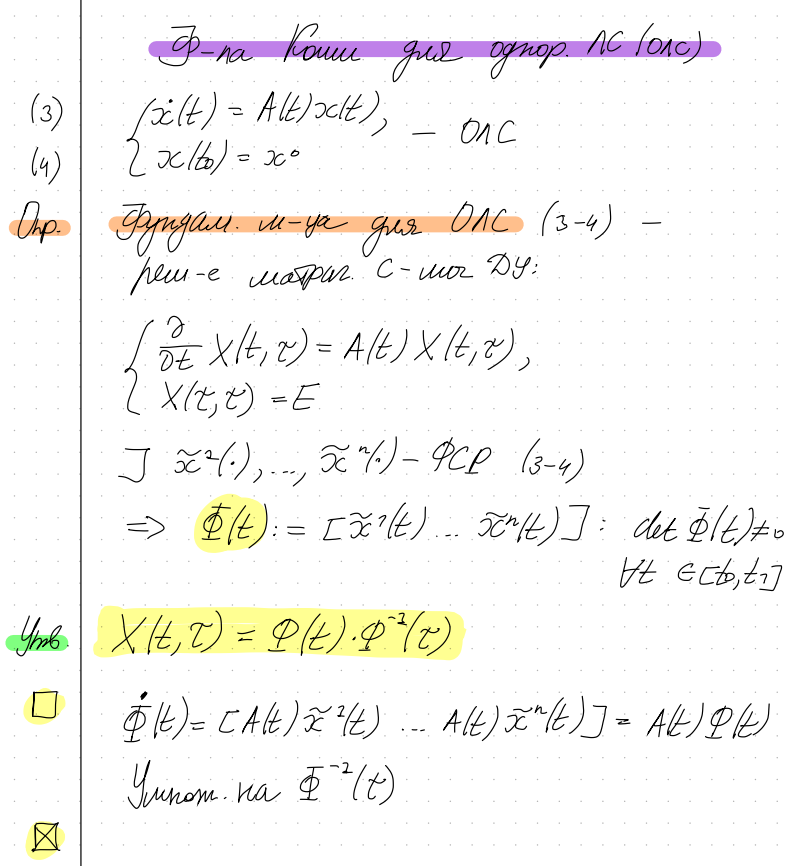

In [5]:
#http://twt.mpei.ac.ru/math/larb/Quadrf/LA_06030300.html
n = 2
r = 2
A = np.array([[0,1],[-1, 0]]) # n x n
B = np.array([[0,0.5],[1, 0]]) # n x r
M = np.array([[0.1,0],[0, 0.2]]) # n x n symm >= 0
N = np.array([[1,0],[0, 1]]) #r x r symm > 0
T = np.array([[0.4,0],[0, 0.7]]) # n x n >= 0
#print(np.all(N == N.T))
#print(N)
print(LA.eigh(M)[0])

[0.1 0.2]


In [6]:
t_0 = 0
t_1 = 6
n_t = 200

In [7]:
t = np.linspace(t_1,t_0,n_t)
T = T.reshape(-1)

In [8]:
P = odeint(P_calc,T,t, args = (A,B,N,M,n))
P = P.transpose()
P = P.reshape(n,n,n_t)
#for i in range(n_t):
#    print(LA.det(P[:,:,i]))

In [9]:
t = np.linspace(t_1,t_0,n_t)
f = interp1d(t,P, bounds_error=False)

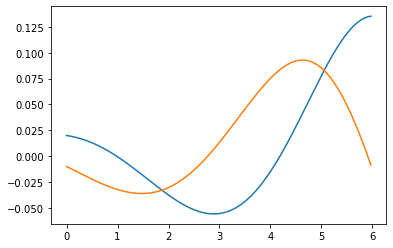

In [10]:
#решение ду
x0 = np.array([0.02,-0.01])
t = np.linspace(t_0,t_1,n_t)
X = odeint(X_cauchy_calc,x0,t, args = (A,B,N,T,M,f,n,r)) # Ф(t)
plt.plot(t,X[:,0])
plt.plot(t,X[:,1])

In [11]:
f_X = interp1d(t,X,axis = 0 ,bounds_error = False)

In [12]:
#решение матричного ду
X0 = np.eye(2).reshape(-1)
t = np.linspace(t_0,t_1,n_t)
Xm = odeint(Matrix_dif,X0,t, args = (A,B,N,T,M,f,n,r)) # Ф(t)
Xm = Xm.reshape(n,n,n_t)

In [13]:
Xm_i = interp1d(t,Xm, bounds_error=False)

In [45]:
h = 4
N_inv = LA.inv(N)
u_opt = np.zeros([n_t,2])
for i in  range(len(t)):
    if (t[i] > t_0 + h):
        A_h = np.dot(N_inv,np.dot(B.T,f(t[i])))
        u_opt[i,0], u_opt[i,1] = -np.dot(A_h,np.dot(Xm_i(t[i] - h),f_X(t[i] - h))) 
    else:
        A_h = np.dot(N_inv,np.dot(B.T,f(t[i])))
        u_opt[i,0], u_opt[i,1] = -np.dot(A_h,np.dot(Xm_i(t[i]),f_X(t[i])))  

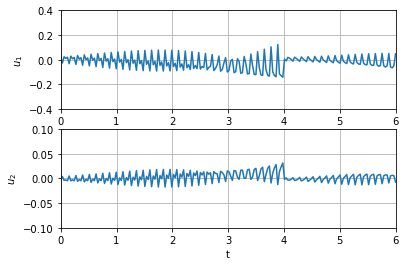

In [46]:
plt.subplot(211)
plt.plot(t,u_opt[:,0])
plt.xlim([0,6])
plt.ylim([-0.4,0.4])
plt.grid(True)
plt.xlabel('t')
plt.ylabel('$u_1$')
plt.subplot(212)
plt.plot(t,u_opt[:,1])
plt.xlim([0,6])
plt.ylim([-0.1,0.1])
plt.grid(True)
plt.xlabel('t')
plt.ylabel('$u_2$')
#plt.savefig('v_h4.pdf')